**Author : RAJDEEP PORUA**

**Task 1 : Prediction using Supervised Machine Learning**

**GRIP @ The Sparks Foundation**

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

**Reading the data from source**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.shape

(25, 2)

In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Input data Visualization**

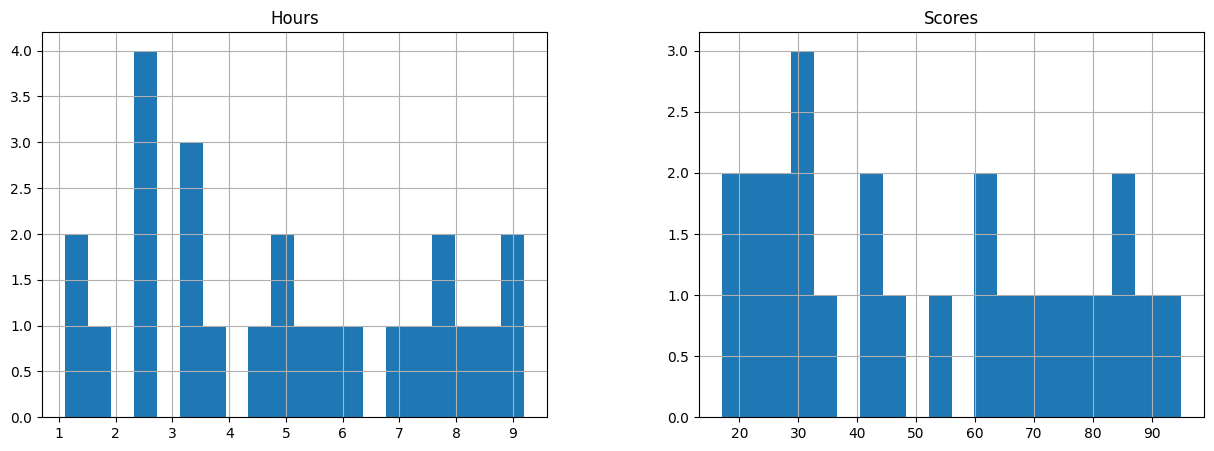

In [ ]:
data.hist(bins = 20,figsize = (15,5));

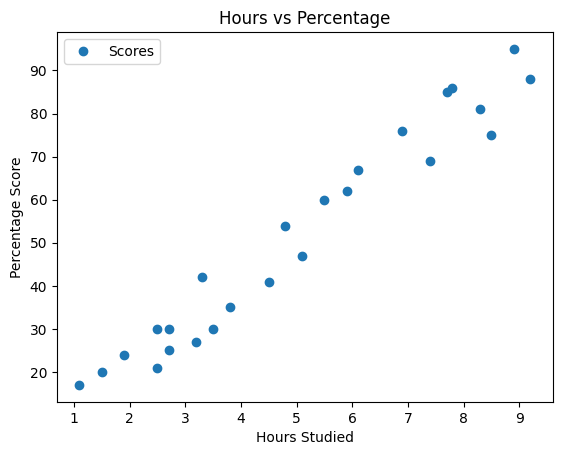

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
y=data["Scores"]
X=data.drop("Scores",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Model Training**

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
linear_reg = LinearRegression()

# fit the model 
linear_reg.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = linear_reg.predict(X_test)
y_train_lr = linear_reg.predict(X_train)

In [ ]:
y_test_linear_reg = linear_reg.predict(X_test)
y_train_linear_reg = linear_reg.predict(X_train)

In [ ]:
acc_train_linear_reg = linear_reg.score(X_train, y_train)
acc_test_linear_reg = linear_reg.score(X_test, y_test)

**Plotting the Line of regression**

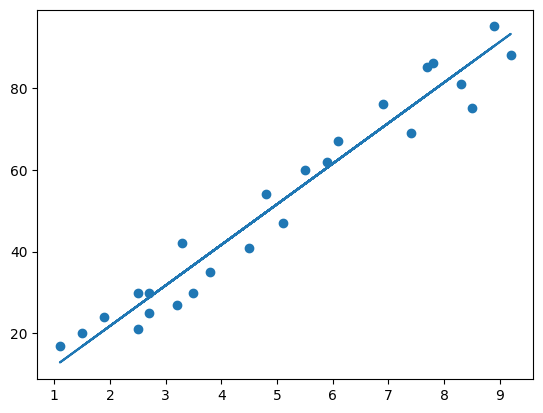

In [ ]:
# Plotting the regression line
line = linear_reg.coef_*X+linear_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.


In [ ]:
#importing required libraries 
from sklearn.metrics import mean_squared_error

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_linear_reg))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_linear_reg))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.952
Linear Regression: Accuracy on test Data: 0.945

Linear Regression: The RMSE of the training set is: 5.558613350226344
Linear Regression: The RMSE of the testing set is: 4.647447612100373


Comparing Actual result to the Predicted Model result

In [ ]:
dict={"Actual":y_test,"Predicted":y_test_linear_reg}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
result=linear_reg.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))


The Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.


**Conclusion**

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.